In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [5]:
# Generate random data for dogs and cats
np.random.seed(0) # For reproducibility

In [6]:
# Dogs: higher ear flappiness, lower whisker length
dog_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dog_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [7]:
# Cats: lower ear flappiness, higher whisker length
cat_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cat_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [8]:
# Combine data
dogs_data = np.vstack((dog_whisker_length, dog_ear_flappiness_index)).T
cats_data = np.vstack((cat_whisker_length, cat_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))  # 0 for dogs, 1 for cats

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_test.shape: (4, 2)
y_test.shape: (4,)
X_train.shape: (16, 2)
y_train.shape: (16,)


In [29]:
y_test

array([0., 1., 1., 0.])

In [11]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [32]:
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_test.shape: (4, 2)
y_test.shape: (4,)


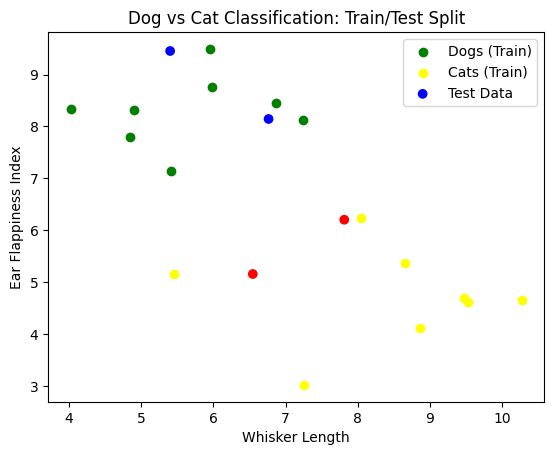

In [12]:
# Plot the training and testing data points
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color='green', label='Dogs (Train)', marker='o')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='yellow', label='Cats (Train)', marker='o')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr', label='Test Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification: Train/Test Split')
plt.legend()
plt.show()

In [13]:
# Implementing random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d): 
    # d is the no'of features we have 2 (whiskers length and ear flappiness index)
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, best_error

def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

In [14]:
# Define function for k-fold cross-validation
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            x_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            x_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(x_train_fold[y_train_fold==0], x_train_fold[y_train_fold==1], k, d)
            errors.append(compute_error(x_val_fold[y_val_fold==0], x_val_fold[y_val_fold==1], best_theta_fold, best_theta0_fold))
        avg_errors.append(np.mean(errors))
    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Define k values to try
k_values = [10, 50, 100, 200, 300]
best_k = cross_validate(dogs_data, cats_data, k_values, d=2)
print(f"Best k from cross-validation: {best_k}")


Best k from cross-validation: 100


In [21]:
# Run random linear classifier algorithm
k = best_k # number of iterations
d = 2   # number of features
best_theta_train, best_theta0_train, train_error = random_linear_classifier(X_train[y_train==0], X_train[y_train==1], k, d)

In [16]:
# Plot the decision boundary on training data
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0]/best_theta_train[1]) * x_vals_train - (best_theta0_train/best_theta_train[1])

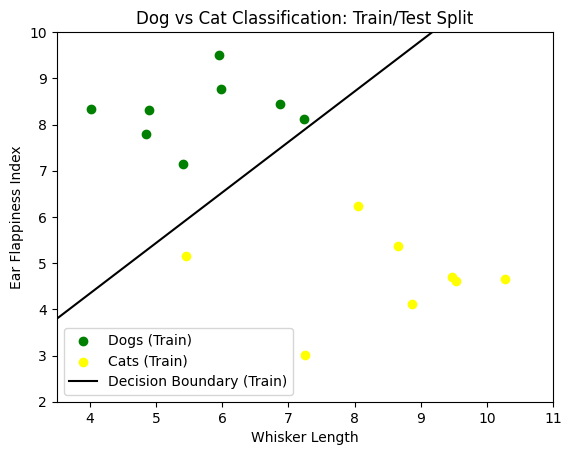

In [17]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color='green', label='Dogs (Train)', marker='o')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='yellow', label='Cats (Train)', marker='o')
plt.plot(x_vals_train, y_vals_train, color='black', label='Decision Boundary (Train)')
# Set same limits for x and y axes
plt.xlim(3.5, 11)
plt.ylim(2, 10)
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification: Train/Test Split')
plt.legend()
plt.show()

In [30]:
print("X_test.shape:", X_train.shape)
print("y_test.shape:", y_train.shape)

X_test.shape: (16, 2)
y_test.shape: (16,)


In [18]:
print(f"Training Error: {train_error}")

Training Error: 0


In [19]:
# Compute testing error
test_error = compute_error(X_test[y_test==0], X_test[y_test==1], best_theta_train, best_theta0_train)
print(f"Testing Error: {test_error}")

Testing Error: 0


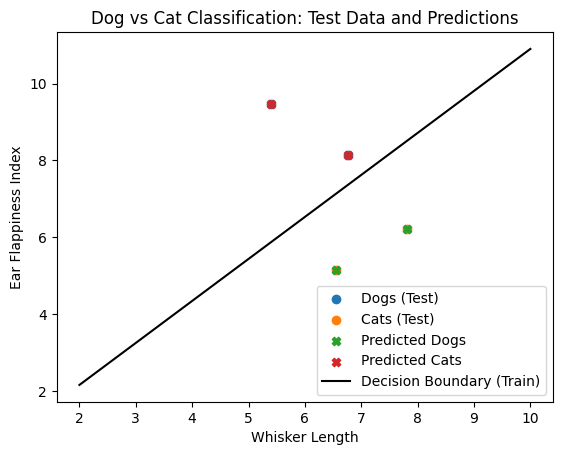

In [34]:
# Plot the actual test data and predicted test data
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], label='Dogs (Test)')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], label='Cats (Test)')

# Predict test data points using the decision boundary
predicted_labels = np.zeros_like(y_test)
for i, x_test in enumerate(X_test):
    if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
        predicted_labels[i] = 1

# Plot predicted labels    
plt.scatter(X_test[predicted_labels==0][:,0], X_test[predicted_labels==0][:,1], label='Predicted Dogs', marker='X')
plt.scatter(X_test[predicted_labels==1][:,0], X_test[predicted_labels==1][:,1], label='Predicted Cats', marker='X')

# Plot decision boundary
plt.plot(x_vals_train, y_vals_train, color='black', label='Decision Boundary (Train)')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification: Test Data and Predictions')
plt.legend()
plt.show()

In [27]:
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_test.shape: (2,)
y_test.shape: (4,)
